In [ ]:
# Seleccionar un problema e identificar un objetivo

"""

Una película comercial por lo general entretiene al públivo y genera grandes ingresos en taquillas para las compañias cinematográficas.
Hay diferentes factores que garantizan el éxito, por ejemplo, grandes directores y actores. Sin embargo, ha sucedido que películas con
grandes actores y directores no han tenido el éxito esperado en cuanto a taquilla y calificación IMDB.

Basándonos en una base de datos con diferente información relacionada a películas
queremos comprender los factores más importantes que determinan el éxito de una película.
Por lo tanto, analizaremos qué género de película es mas exitoso, en pocas palabras cuáles tienen la calificación IMDB más alta.

IMDB_Score Calificación
1-3        Mala
4-7        Aceptable
8-10       Exitosa

"""

'\n\nUna película comercial por lo general entretiene al públivo y genera grandes ingresos en taquillas para las compañias cinematográficas.\nHay diferentes factores que garantizan el éxito, por ejemplo, grandes directores y actores. Sin embargo, ha sucedido que películas con\ngrandes actores y directores no han tenido el éxito esperado en cuanto a taquilla y calificación IMDB.\n\nBasándonos en una base de datos con diferente información relacionada a películas\nqueremos comprender los factores más importantes que determinan el éxito de una película.\nPor lo tanto, analizaremos qué género de película es mas exitoso, en pocas palabras cuáles tienen la calificación IMDB más alta.\n\nIMDB_Score Calificación\n1-3        Mala\n4-7        Aceptable\n8-10       Exitosa\n\n'

In [ ]:
# Carga del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1 Importar el dataset
dataset = pd.read_csv('/content/movie_metadata.csv')
dataset.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [ ]:
dataset.shape

(5043, 28)

In [ ]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
#2 Revision de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
#4 Tratamiento de los datos faltantes
dataset.isnull().sum()

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [ ]:
numerical_cols = [ col for col in dataset.columns if dataset[col].dtype != "object"]
categorical_cols= [col for col in dataset.columns if dataset[col].dtype != "object" ]
numerical_cols, categorical_cols

(['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

In [ ]:
dataset[numerical_cols].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
dataset.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [ ]:
color_mode = dataset["color"].mode().iloc[0]
dataset.color.fillna(color_mode, inplace = True)
dataset.color.isnull().sum()

<ipython-input-16-0c0aa4db1fcc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.color.fillna(color_mode, inplace = True)


0

In [ ]:
dataset.director_name.nunique(), dataset.director_name.isnull().sum()

(2398, 104)

In [ ]:
dataset = dataset.dropna(axis=0 ,subset=["director_name"])

In [ ]:
dataset.shape

(4939, 28)

In [ ]:
dataset.num_critic_for_reviews.min(), dataset.num_critic_for_reviews.max()

(1.0, 813.0)

In [ ]:
dataset.num_critic_for_reviews.median()

112.0

In [ ]:
dataset.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0$,2011.0,205.0,6.4,NaN,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,0.0$,2013.0,470.0,7.7,NaN,84
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0$,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,0.0$,2012.0,719.0,6.3,2.35,660


In [ ]:
#3 Busqueda y eliminación de duplicados
duplicados = dataset.duplicated(). sum()
print(f"duplicados encontrados: {duplicados}")

duplicados encontrados: 44


In [ ]:
# Eliminar duplicados
dataset1 = dataset.drop_duplicates()
print (dataset1)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5037  Color       Edward Burns                    14.0      95.0   
5038  Color        Scott Smith                     1.0      87.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

In [ ]:
dataset1.to_csv("movie_metadata(2).csv")

In [ ]:
#4 Identificación de valores nulos
valores_faltantes = dataset1.isnull().sum()
print(valores_faltantes)

color                          0
director_name                  0
num_critic_for_reviews        44
duration                      13
director_facebook_likes        0
actor_3_facebook_likes        20
actor_2_name                  11
actor_1_facebook_likes         7
gross                        774
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster          13
plot_keywords                143
movie_imdb_link                0
num_user_for_reviews          19
language                      13
country                        3
content_rating               263
budget                         0
title_year                     4
actor_2_facebook_likes        11
imdb_score                     0
aspect_ratio                 308
movie_facebook_likes           0
dtype: int64


In [ ]:
data_median= dataset1.copy()
data_median["num_critic_for_reviews"].fillna(data_median["num_critic_for_reviews"].median(), inplace=True)

In [ ]:
print(data_median)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                   112.0       NaN   
...     ...                ...                     ...       ...   
5037  Color       Edward Burns                    14.0      95.0   
5038  Color        Scott Smith                     1.0      87.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

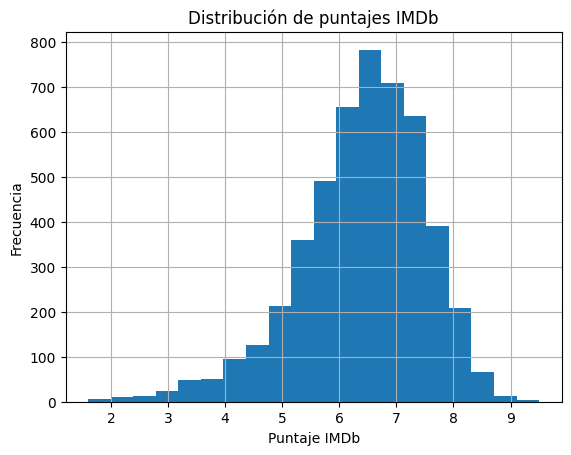

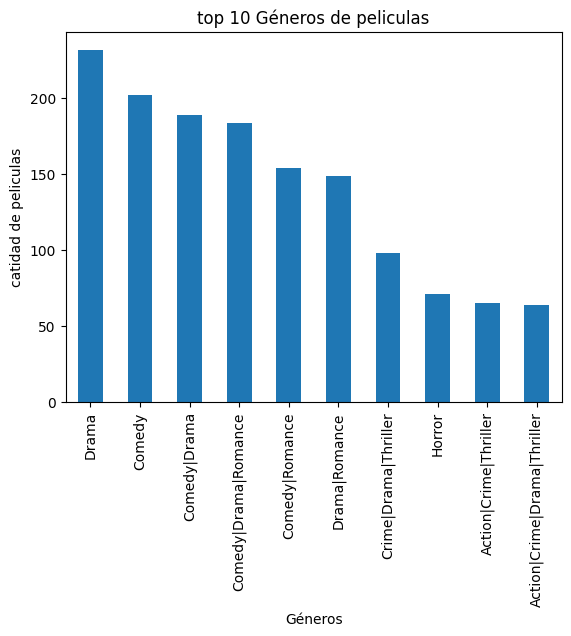

In [ ]:
# 5 Visualizacion de variables
#Histograma de puntajes IMDb
dataset1 ["imdb_score"].hist(bins=20)
plt.title("Distribución de puntajes IMDb")
plt.xlabel("Puntaje IMDb")
plt.ylabel("Frecuencia")
plt.show()

#Grafico de barras para los géneros
dataset["genres"].value_counts().head(10).plot(kind= "bar")
plt.title("top 10 Géneros de peliculas")
plt.xlabel("Géneros")
plt.ylabel("catidad de peliculas")
plt.show()


In [ ]:
import pandas as pd

In [ ]:
#6 Analisis de correlación
data_median["budget"] = data_median ["budget"].astype(str).str.replace('$', '', regex=False)

In [ ]:
print(data_median)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                   112.0       NaN   
...     ...                ...                     ...       ...   
5037  Color       Edward Burns                    14.0      95.0   
5038  Color        Scott Smith                     1.0      87.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

In [ ]:
correlation= data_median[['budget', 'gross', 'imdb_score']].corr()
print(correlation)

              budget     gross  imdb_score
budget      1.000000  0.106864    0.030463
gross       0.106864  1.000000    0.199849
imdb_score  0.030463  0.199849    1.000000


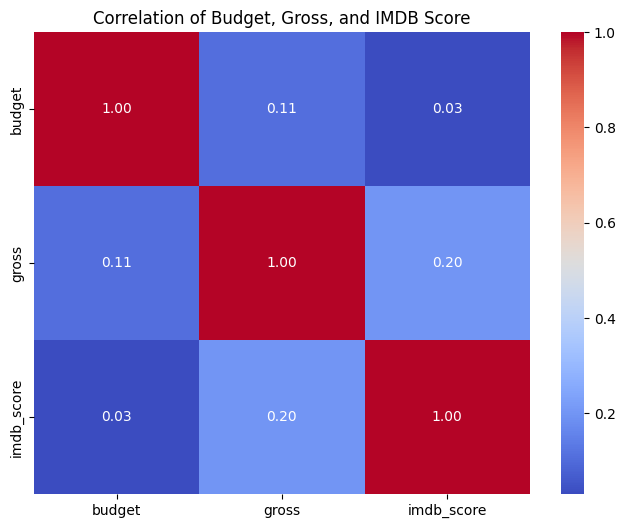

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Budget, Gross, and IMDB Score')
plt.show()

Text(0.5, 1.0, 'Budget vs Gross')

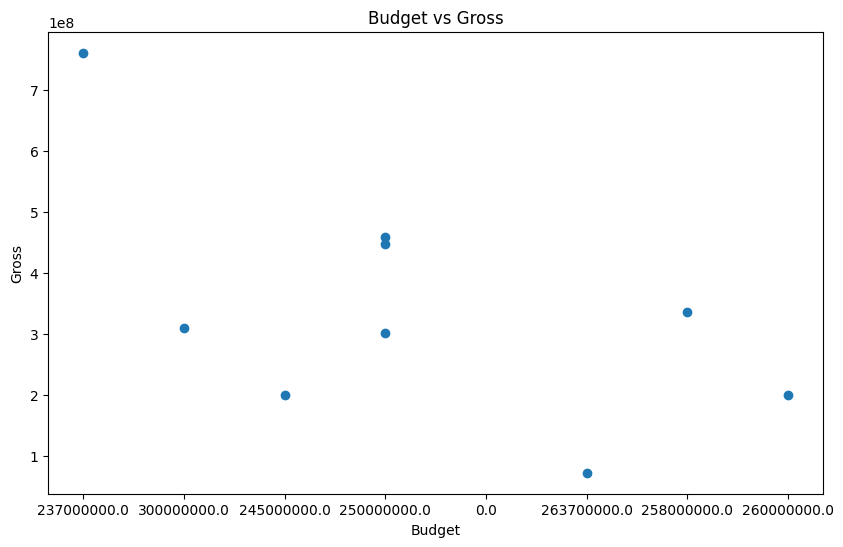

In [ ]:
#7 Graficos de dispersión:
#Crear un grafico de dispersión para analizar la relación entre budget y gross.
plt.figure(figsize=(10, 6))
plt.scatter(data_median['budget'].head(10), data_median['gross'].head(10))
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross')

Text(0, 0.5, 'Budget')

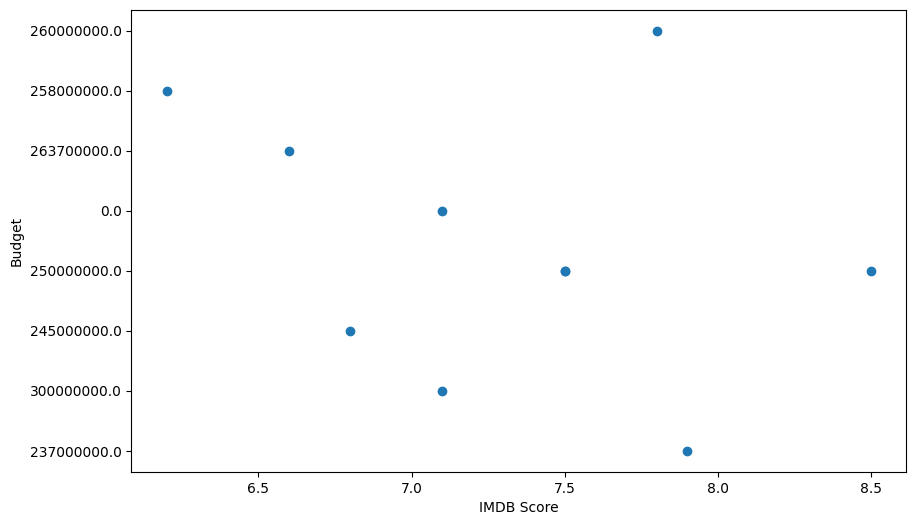

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_median['imdb_score'].head(10), data_median['budget'].head(10))
plt.xlabel('IMDB Score')
plt.ylabel('Budget')